## Segmentation

In [1]:
!pip install torch torchvision opencv-python

In [2]:
!pip install git+https://github.com/facebookresearch/segment-anything.git

  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-tibnv7rk
  Running command git clone -q https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-tibnv7rk
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588


In [1]:
import torch
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import os

In [2]:
!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

--2024-08-09 00:08:24--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 18.239.236.98, 18.239.236.19, 18.239.236.78, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|18.239.236.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2564550879 (2.4G) [binary/octet-stream]
Saving to: ‘sam_vit_h_4b8939.pth.6’

sam_vit_h_4b8939.pt 100%[===================>]   2.39G   110MB/s    in 23s     

2024-08-09 00:08:46 (108 MB/s) - ‘sam_vit_h_4b8939.pth.6’ saved [2564550879/2564550879]



In [3]:
sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"  

device = "cuda" if torch.cuda.is_available() else "cpu"
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

Sam(
  (image_encoder): ImageEncoderViT(
    (patch_embed): PatchEmbed(
      (proj): Conv2d(3, 1280, kernel_size=(16, 16), stride=(16, 16))
    )
    (blocks): ModuleList(
      (0-31): 32 x Block(
        (norm1): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (attn): Attention(
          (qkv): Linear(in_features=1280, out_features=3840, bias=True)
          (proj): Linear(in_features=1280, out_features=1280, bias=True)
        )
        (norm2): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (lin1): Linear(in_features=1280, out_features=5120, bias=True)
          (lin2): Linear(in_features=5120, out_features=1280, bias=True)
          (act): GELU(approximate='none')
        )
      )
    )
    (neck): Sequential(
      (0): Conv2d(1280, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (1): LayerNorm2d()
      (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (3): LayerNorm2d

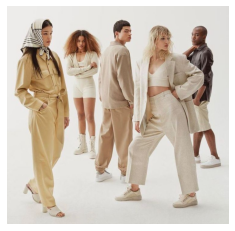

In [4]:
image_path = "/transfer/MasterProject/test_img/2.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.axis('off')
plt.show()

### Segment all

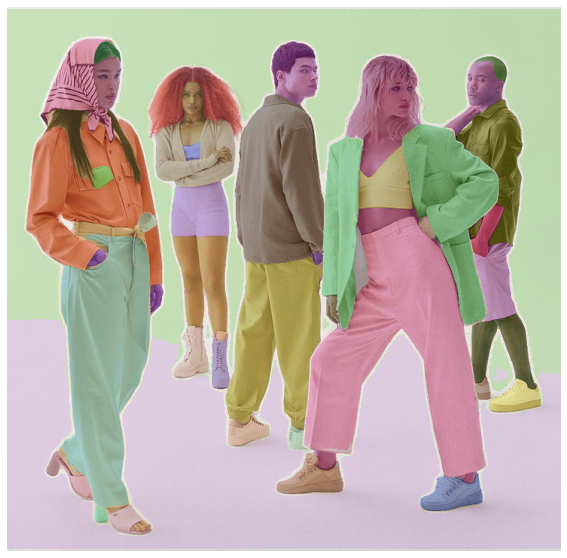

In [5]:
mask_generator = SamAutomaticMaskGenerator(sam)

masks = mask_generator.generate(image)

def show_anns(image, anns):
    if len(anns) == 0:
        return
    
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)
    
    img = np.ones((image.shape[0], image.shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

plt.figure(figsize=(10, 10))
plt.imshow(image)
show_anns(image, masks)
plt.axis('off')
plt.show()

Saved segmented image 1 to segmented_images_2/segmented_image_1.png
Saved segmented image 2 to segmented_images_2/segmented_image_2.png
Saved segmented image 3 to segmented_images_2/segmented_image_3.png
Saved segmented image 4 to segmented_images_2/segmented_image_4.png
Saved segmented image 5 to segmented_images_2/segmented_image_5.png
Saved segmented image 6 to segmented_images_2/segmented_image_6.png
Saved segmented image 7 to segmented_images_2/segmented_image_7.png
Saved segmented image 8 to segmented_images_2/segmented_image_8.png
Saved segmented image 9 to segmented_images_2/segmented_image_9.png
Saved segmented image 10 to segmented_images_2/segmented_image_10.png
Saved segmented image 11 to segmented_images_2/segmented_image_11.png
Saved segmented image 12 to segmented_images_2/segmented_image_12.png
Saved segmented image 13 to segmented_images_2/segmented_image_13.png
Saved segmented image 14 to segmented_images_2/segmented_image_14.png
Saved segmented image 15 to segmented_

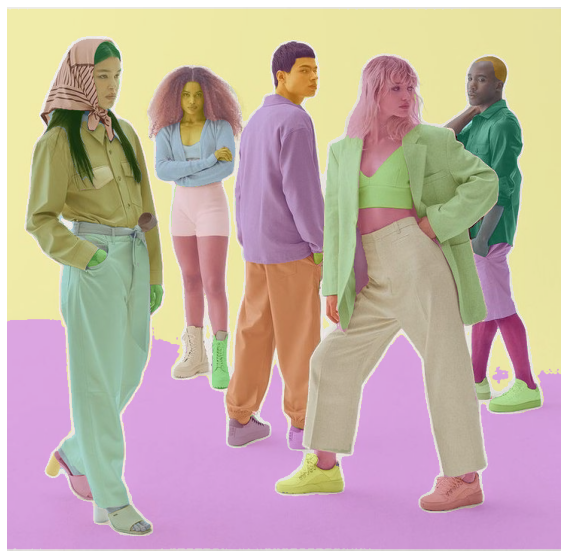

In [6]:
output_folder = "segmented_images_2"
os.makedirs(output_folder, exist_ok=True)

for i, mask_info in enumerate(masks):
    mask = mask_info['segmentation']
    segmented_image = np.zeros_like(image)
    segmented_image[mask] = image[mask]
    
    output_path = os.path.join(output_folder, f"segmented_image_{i+1}.png")
    cv2.imwrite(output_path, cv2.cvtColor(segmented_image, cv2.COLOR_RGB2BGR))
    
    print(f"Saved segmented image {i+1} to {output_path}")

def show_anns(image, anns):
    if len(anns) == 0:
        return
    
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)
    
    img = np.ones((image.shape[0], image.shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

plt.figure(figsize=(10, 10))
plt.imshow(image)
show_anns(image, masks)
plt.axis('off')
plt.show()

# Segment some

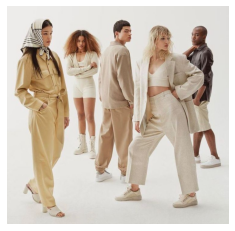

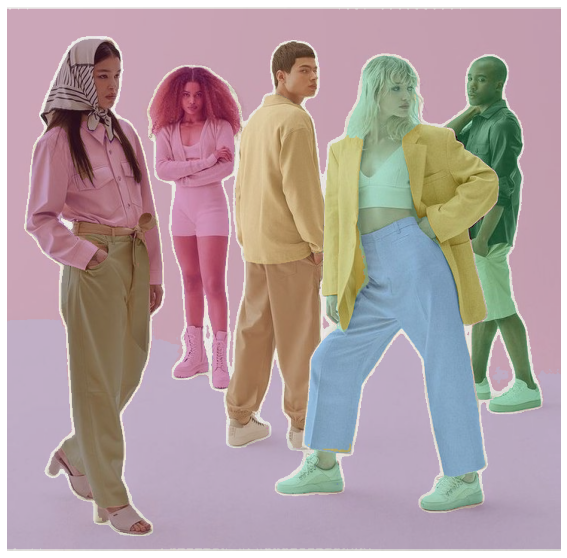

Saved segmented image 1 to segmented_images_some2/segmented_image_1.png
Saved segmented image 2 to segmented_images_some2/segmented_image_2.png
Saved segmented image 3 to segmented_images_some2/segmented_image_3.png
Saved segmented image 4 to segmented_images_some2/segmented_image_4.png
Saved segmented image 5 to segmented_images_some2/segmented_image_5.png
Saved segmented image 6 to segmented_images_some2/segmented_image_6.png
Saved segmented image 7 to segmented_images_some2/segmented_image_7.png
Saved segmented image 8 to segmented_images_some2/segmented_image_8.png
Saved segmented image 9 to segmented_images_some2/segmented_image_9.png
Saved segmented image 10 to segmented_images_some2/segmented_image_10.png
Saved segmented image 11 to segmented_images_some2/segmented_image_11.png
Saved segmented image 12 to segmented_images_some2/segmented_image_12.png
Saved segmented image 13 to segmented_images_some2/segmented_image_13.png
Saved segmented image 14 to segmented_images_some2/segme

In [7]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from segment_anything import SamAutomaticMaskGenerator

image_path = "/transfer/MasterProject/test_img/2.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.axis('off')
plt.show()

new_mask_generator = SamAutomaticMaskGenerator(sam)

new_masks = new_mask_generator.generate(image)

def show_new_anns(image, anns, num_layers=None):
    if len(anns) == 0:
        return
    
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    if num_layers:
        sorted_anns = sorted_anns[:num_layers]
        
    ax = plt.gca()
    ax.set_autoscale_on(False)
    
    img = np.ones((image.shape[0], image.shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

num_new_layers_to_display = 20  
plt.figure(figsize=(10, 10))
plt.imshow(image)
show_new_anns(image, new_masks, num_layers=num_new_layers_to_display)
plt.axis('off')
plt.show()

new_output_folder = "segmented_images_some2"
os.makedirs(new_output_folder, exist_ok=True)

def save_new_segmented_images(image, masks, num_layers=None):
    sorted_anns = sorted(masks, key=(lambda x: x['area']), reverse=True)
    if num_layers:
        sorted_anns = sorted_anns[:num_layers]
        
    for i, mask_info in enumerate(sorted_anns):
        mask = mask_info['segmentation']
        segmented_image = np.zeros_like(image)
        segmented_image[mask] = image[mask]
        
        output_path = os.path.join(new_output_folder, f"segmented_image_{i+1}.png")
        cv2.imwrite(output_path, cv2.cvtColor(segmented_image, cv2.COLOR_RGB2BGR))
        
        print(f"Saved segmented image {i+1} to {output_path}")

num_new_layers_to_save = 20  
save_new_segmented_images(image, new_masks, num_layers=num_new_layers_to_save)


## Extract Human

In [8]:
import os
import torch
import torchvision
from torchvision import transforms, datasets
from torch.utils.data import DataLoader, Dataset
from collections import Counter
from PIL import Image
from pycocotools.coco import COCO
import matplotlib.pyplot as plt

In [10]:
dataset = datasets.VOCDetection(root='.', year='2012', image_set='trainval', download=True)

Using downloaded and verified file: ./VOCtrainval_11-May-2012.tar
Extracting ./VOCtrainval_11-May-2012.tar to .


In [11]:
class VOCPersonDataset(torch.utils.data.Dataset):
    def __init__(self, voc_dataset, transform=None):
        self.voc_dataset = voc_dataset
        self.transform = transform
        self.person_images = []  
        self.non_person_images = []         
        self.labels_counter = Counter()  

        for img_id in range(len(voc_dataset)):
            img, target = voc_dataset[img_id]
            objects = target['annotation']['object']
            if isinstance(objects, dict):
                objects = [objects]
            is_person = False
            for obj in objects:
                self.labels_counter[obj['name']] += 1
                if obj['name'] == 'person':
                    is_person = True
            if is_person:
                self.person_images.append((img, 1))  
            else:
                self.non_person_images.append((img, 0))  

        min_len = min(len(self.person_images), len(self.non_person_images))
        self.person_images = self.person_images[:min_len]
        self.non_person_images = self.non_person_images[:min_len]
        self.images = self.person_images + self.non_person_images

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img, label = self.images[idx]
        if self.transform:
            img = self.transform(img)
        return img, label


transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])


voc_person_dataset = VOCPersonDataset(dataset, transform=transform)



In [13]:
print(f"Total dataset size: {len(voc_person_dataset)}")


print(f"Images containing person: {len(voc_person_dataset.person_images)}")
print(f"Images not containing person: {len(voc_person_dataset.non_person_images)}")

Total dataset size: 8748
Images containing person: 4374
Images not containing person: 4374


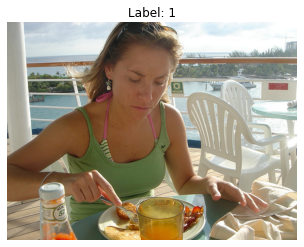

In [14]:
import matplotlib.pyplot as plt

person_image, label = voc_person_dataset.person_images[3145]

plt.imshow(person_image)
plt.title(f'Label: {label}')
plt.axis('off')
plt.show()

In [15]:
import torch
from torch.utils.data import DataLoader, random_split

train_size = int(0.8 * len(voc_person_dataset))
test_size = len(voc_person_dataset) - train_size
train_dataset, test_dataset = random_split(voc_person_dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [16]:
import torch.nn as nn
import torch.nn.functional as F

class ImprovedCNN(nn.Module):
    def __init__(self):
        super(ImprovedCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        
        self.fc1 = nn.Linear(128 * 16 * 16, 512)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(512, 128)
        self.fc3 = nn.Linear(128, 2)

    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = self.pool(F.relu(self.bn3(self.conv3(x))))
        x = x.view(-1, 128 * 16 * 16)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

model = ImprovedCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


Using device: cuda


In [18]:
def save_checkpoint(model, optimizer, epoch, path="checkpoints1"):
    os.makedirs(path, exist_ok=True)
    
    checkpoint_path = os.path.join(path, f"checkpoint_epoch_{epoch}.pth")
    
    checkpoint = {
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'epoch': epoch,
    }
    torch.save(checkpoint, checkpoint_path)
    print(f"Checkpoint saved to {checkpoint_path}")


In [19]:
def train_model(model, train_loader, criterion, optimizer, start_epoch=0, num_epochs=10):
    model.train()
    for epoch in range(start_epoch, start_epoch + num_epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f'Epoch [{epoch+1}/{start_epoch + num_epochs}], Loss: {running_loss/len(train_loader):.4f}')
        save_checkpoint(model, optimizer, epoch + 1)

train_model(model, train_loader, criterion, optimizer, num_epochs=20)


Epoch [1/20], Loss: 0.9057
Checkpoint saved to checkpoints1/checkpoint_epoch_1.pth
Epoch [2/20], Loss: 0.6690
Checkpoint saved to checkpoints1/checkpoint_epoch_2.pth
Epoch [3/20], Loss: 0.6433
Checkpoint saved to checkpoints1/checkpoint_epoch_3.pth
Epoch [4/20], Loss: 0.6330
Checkpoint saved to checkpoints1/checkpoint_epoch_4.pth
Epoch [5/20], Loss: 0.6159
Checkpoint saved to checkpoints1/checkpoint_epoch_5.pth
Epoch [6/20], Loss: 0.6079
Checkpoint saved to checkpoints1/checkpoint_epoch_6.pth
Epoch [7/20], Loss: 0.5942
Checkpoint saved to checkpoints1/checkpoint_epoch_7.pth
Epoch [8/20], Loss: 0.5776
Checkpoint saved to checkpoints1/checkpoint_epoch_8.pth
Epoch [9/20], Loss: 0.5659
Checkpoint saved to checkpoints1/checkpoint_epoch_9.pth
Epoch [10/20], Loss: 0.5527
Checkpoint saved to checkpoints1/checkpoint_epoch_10.pth
Epoch [11/20], Loss: 0.5447
Checkpoint saved to checkpoints1/checkpoint_epoch_11.pth
Epoch [12/20], Loss: 0.5300
Checkpoint saved to checkpoints1/checkpoint_epoch_12.pt

In [20]:
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f'Accuracy: {100 * correct / total:.2f}%')


In [21]:
def load_checkpoint(model, optimizer, path="checkpoint.pth"):
    checkpoint = torch.load(path)
    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    epoch = checkpoint['epoch']
    print(f"Checkpoint loaded from {path}, starting from epoch {epoch}")
    return epoch


In [24]:
train_model(model, train_loader, criterion, optimizer, start_epoch=start_epoch, num_epochs=2)

Epoch [36/37], Loss: 0.3174
Checkpoint saved to checkpoints/checkpoint_epoch_36.pth
Epoch [37/37], Loss: 0.2529
Checkpoint saved to checkpoints/checkpoint_epoch_37.pth


In [27]:
start_epoch = load_checkpoint(model, optimizer, path="checkpoints/checkpoint_epoch_37.pth")

Checkpoint loaded from checkpoints/checkpoint_epoch_37.pth, starting from epoch 37


### Test images in folder

In [28]:
from PIL import Image

def load_and_preprocess_image(image_path):

    transform = transforms.Compose([
        transforms.Resize((128, 128)),
        transforms.ToTensor(),
        transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
    ])
    
    image = Image.open(image_path).convert('RGB')
    image = transform(image)
    image = image.unsqueeze(0) 
    return image

In [29]:
def predict_image(model, image_path):
    image = load_and_preprocess_image(image_path).to(device)
    
    model.eval()
    with torch.no_grad():
        outputs = model(image)
        _, predicted = torch.max(outputs, 1)
    
    return predicted.item()


segmented_image_15.png is a person.


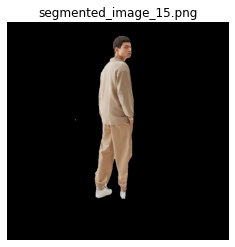

segmented_image_22.png is a person.


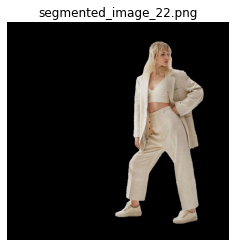

segmented_image_23.png is a person.


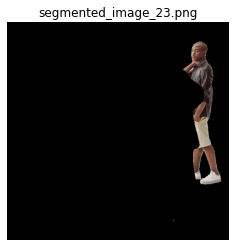

segmented_image_5.png is a person.


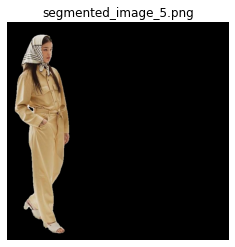

segmented_image_32.png is a person.


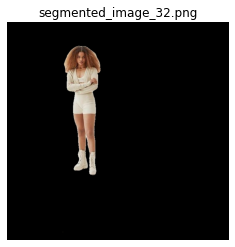

In [30]:
image_folder = "/transfer/MasterProject/segmented_images_2"
image_files = [f for f in os.listdir(image_folder) if f.endswith('.png') or f.endswith('.jpg')]

human_images = []

for image_file in image_files:
    image_path = os.path.join(image_folder, image_file)
    result = predict_image(model, image_path)
    if result == 1:
        human_images.append(image_file)

for image_file in human_images:
    print(f"{image_file} is a person.")
    image_path = os.path.join(image_folder, image_file)
    image = Image.open(image_path)
    plt.imshow(image)
    plt.title(image_file)
    plt.axis('off')
    plt.show()